In [2]:
#Import libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statistics import mode
import numpy as np


In [3]:
#Read csv file
df = pd.read_csv(Path('CleaningData/formula1.csv'))
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,status,driverRef,constructorRef,circuitId,name,year,circuitRef
0,23783,989,1,131,44,1,2,2,2,18.0,...,01:26.4,220.845,1,Finished,hamilton,mercedes,1,Australian Grand Prix,2018,albert_park
1,23784,989,8,6,7,2,3,3,3,15.0,...,01:26.4,221.027,1,Finished,raikkonen,ferrari,1,Australian Grand Prix,2018,albert_park
2,23782,989,20,6,5,3,1,1,1,25.0,...,01:26.5,220.782,1,Finished,vettel,ferrari,1,Australian Grand Prix,2018,albert_park
3,23787,989,830,9,33,4,6,6,6,8.0,...,01:26.9,219.737,1,Finished,max_verstappen,red_bull,1,Australian Grand Prix,2018,albert_park
4,23798,989,825,210,20,5,\N,R,17,0.0,...,01:29.5,213.224,36,Wheel,kevin_magnussen,haas,1,Australian Grand Prix,2018,albert_park


In [4]:
cons_win = df.groupby(["constructorId", "positionOrder"]).points.agg(['sum']).reset_index()
 

In [5]:
cons_win

,constructorId,positionOrder,sum
0,1,1,27.0
1,1,2,36.0
2,1,3,76.0
3,1,4,78.0
4,1,5,180.0
...,...,...,...
259,214,16,0.0
260,214,17,0.0
261,214,18,0.0
262,214,19,0.0


In [195]:
df2= pd.DataFrame(cons_win)
df2.to_csv('cons_win.csv')

Text(0, 0.5, 'constructorId')

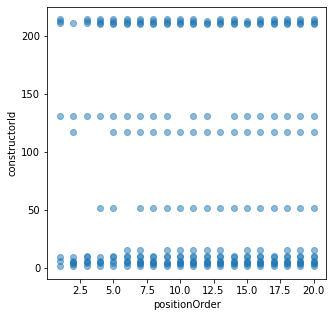

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=cons_win.positionOrder, y=cons_win.constructorId,alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('constructorId')

In [88]:
pints_agg = df.groupby('constructorId').points.agg(['sum']).reset_index()


In [80]:
print(pints_agg)

    constructorId     sum
0               1   684.0
1               3    31.0
2               4   394.0
3               5   118.0
4               6  1529.5
5               9  1740.5
6              10   111.0
7              15    48.0
8              51    78.0
9             117    77.0
10            131  2580.5
11            210   124.0
12            211   283.0
13            213   249.0
14            214   155.0


In [72]:
position_agg = df.groupby(['constructorId','positionOrder']).positionOrder.agg(['count']).reset_index().rename(columns = {'count':'totalpo'})


In [73]:
print(position_agg)

     constructorId  positionOrder  totalpo
0                1              1        1
1                1              2        2
2                1              3        5
3                1              4        7
4                1              5       18
..             ...            ...      ...
259            214             16        1
260            214             17        1
261            214             18        1
262            214             19        2
263            214             20        2

[264 rows x 3 columns]


Text(0, 0.5, 'constructorId')

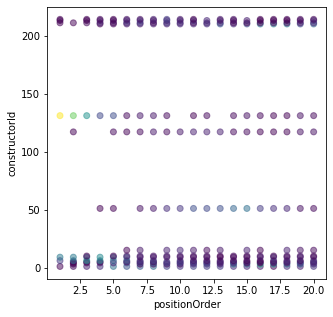

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=position_agg.positionOrder, y=position_agg.constructorId, c=position_agg.totalpo,alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('constructorId')



In [ ]:
df2= pd.DataFrame(position_agg)
df2.to_csv('position_agg.csv')

### Constructor points per circuit

In [14]:
positions_agg = df.groupby(['constructorId','positionOrder','circuitId']).points.agg(['sum']).reset_index().sort_values('circuitId').rename(columns = {'sum':'sumpoints'})


In [15]:
print(positions_agg)

      constructorId  positionOrder  circuitId  sumpoints
435               5             18          1        0.0
612               9              3          1       15.0
425               5             15          1        0.0
1161            210             18          1        0.0
449               6              1          1       25.0
...             ...            ...        ...        ...
611               9              2         78       19.0
231               3             17         78        0.0
68                1              9         78        2.0
1063            131             20         78        0.0
919             117             10         78        1.0

[1389 rows x 4 columns]


In [29]:
df2= pd.DataFrame(positions_agg)
df2.to_csv('positioncircuit_agg.csv')

Text(0, 0.5, 'sumpoints')

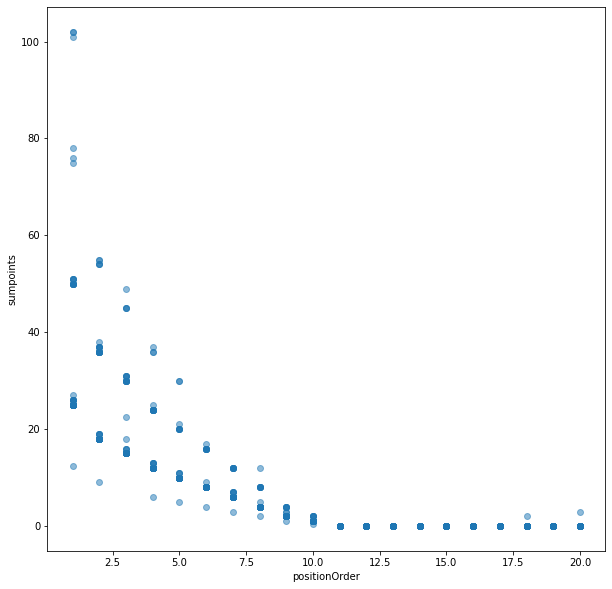

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(x=positions_agg.positionOrder, y=positions_agg.sumpoints, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('sumpoints')

### Constructor points per season

In [28]:
position_season_agg = df.groupby(['constructorId','positionOrder','year']).points.agg(['sum']).reset_index().sort_values('year').rename(columns = {'sum':'sumpoints'})


In [23]:
print(position_season_agg)

     constructorId  positionOrder  year  sumpoints
218              6             17  2018        0.0
298             10             16  2018        0.0
297             10             15  2018        0.0
119              4              8  2018       20.0
296             10             14  2018        0.0
..             ...            ...   ...        ...
355            117              5  2021       15.0
356            117              6  2021        8.0
357            117              7  2021       12.0
435            210             12  2021        0.0
542            214             20  2021        0.0

[543 rows x 4 columns]


Text(0, 0.5, 'sumpoints')

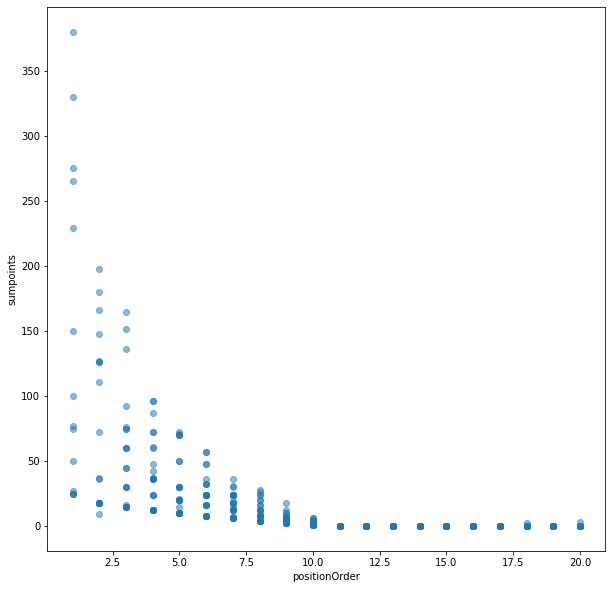

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(x=position_season_agg.positionOrder, y=position_season_agg.sumpoints, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('sumpoints')

In [27]:
df2= pd.DataFrame(position_season_agg)
df2.to_csv('position_season.csv')